In [1]:
# Run this block and make sure it is successful.
import numpy as np  # used for handling mathematical operations easier in python
import tensorflow as tf  # used for creating and training machine learning models 
from tensorflow import keras # Keras contains the mnist dataset
from matplotlib import pyplot as plt  # library that helps us visualize data by creating plots 
import seaborn as sn # visualization library for creating more complex graphs

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 473s 41us/step


The plot represents the number 2


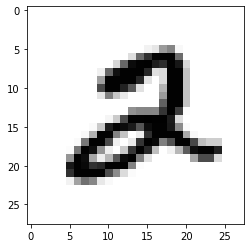

The plot represents the number 3


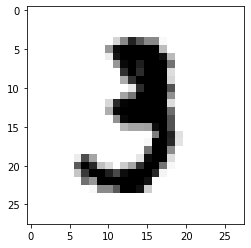

In [3]:
def plotImage(index,x_train,x_test,y_train):
    # Normalize the values so they are a decimal between 0 and 1
    x_train = x_train/255
    x_test = x_test/255
    print(f'The plot represents the number {y_train[index]}')
    plt.imshow(x_train[index],cmap = plt.cm.binary )
    plt.show()


plotImage(5, x_train, x_test, y_train)
plotImage(10, x_train, x_test, y_train)

In [10]:
x_train_flat = x_train.reshape(x_train.shape[0], 784)
x_test_flat = x_test.reshape(x_test.shape[0], 784)

print(x_train_flat.shape)  # (60000, 784)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [11]:
# Model creation
model = keras.Sequential([
    keras.layers.Dense(128, input_shape = (784,),activation='relu'), 
    keras.layers.Dense(64, activation='sigmoid'), 
    keras.layers.Dense(32, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile (
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7054 - accuracy: 0.8218
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3141 - accuracy: 0.9097
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2950 - accuracy: 0.9151
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2843 - accuracy: 0.9167
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2662 - accuracy: 0.9204


In [13]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 993us/step - loss: 0.2676 - accuracy: 0.9196


[0.26758116483688354, 0.9196000099182129]

313/313 [==============================] - 0s 840us/step


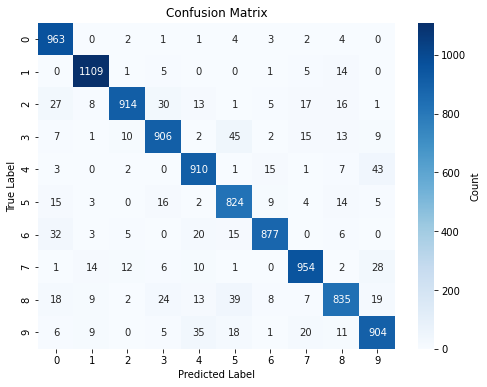

In [14]:

def plot_confusion_matrix(model, x_test_flat, y_test):
    # Make predictions
    y_pred = model.predict(x_test_flat)
    y_pred_labels = [np.argmax(i) for i in y_pred]
    # Create confusion matrix
    confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(model,x_test_flat,y_test)